Importting Dependencies

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

Data collection and preprocessing

In [21]:
mail_data = pd.read_csv('mail_data.csv')
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
# replace null values
mail_data = mail_data.where((pd.notnull(mail_data)), '')

In [23]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Label encoding

In [24]:
# mail_data = pd.get_dummies(mail_data, columns= ['Category'])
mail_data['Category'] = mail_data['Category'].map({"ham":1,"spam":0})
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Separating the data

In [25]:
X = mail_data['Message']
y = mail_data.Category
print(X)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


Spliting the dat train and test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


Feature extraction transform text data to vectors

In [35]:
vectorize = TfidfVectorizer(min_df=1,stop_words='english', lowercase=True)
vectorize.fit(X_train)

X_train_feature = vectorize.transform(X_train)
X_test_feature = vectorize.transform(X_test)

print(X_train_feature)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34768 stored elements and shape (4457, 7458)>
  Coords	Values
  (0, 3958)	0.6161071828926097
  (0, 4334)	0.42941702167641554
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 1428)	0.5869421390016223
  (1, 2121)	0.3573617143022146
  (1, 3168)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (2, 806)	0.26730249393705324
  (2, 1876)	0.2875172512410732
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.3574923058718495
  (2, 5115)	0.3408491178137899
  (2, 5695)	0.3574923058718495
  (2, 5894)	0.3574923058718495
  (2, 6878)	0.3574923058718495
  (2, 7353)	0.3198811806196849
  (3, 197)	0.36522237107066735
  (3, 300)	0.2915969875465198
  (3, 1825)	0.26858331513730566
  (3, 1876)	0.3080768784015236
  (3, 2060)	0.24915048132454623
  (3, 2435)	0.26698378141852
  (3, 3723)	0.16297045459835785
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 1094)	0.24862733340971144
  (4454, 1575)	0.20946314330145205
  (4454, 2244)	0.2526

Model Training

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train_feature,y_train)

LogisticRegression()

Model Evaluation

In [33]:
train_prediction = model.predict(X_train_feature)
accuracy_train = accuracy_score(train_prediction,y_train)
print(accuracy_train)

0.9685887368184878


In [36]:
y_pred = model.predict(X_test_feature)
accuracy_test = accuracy_score(y_test,y_pred)
print(accuracy_test)

0.9533632286995516


Confusion matrix

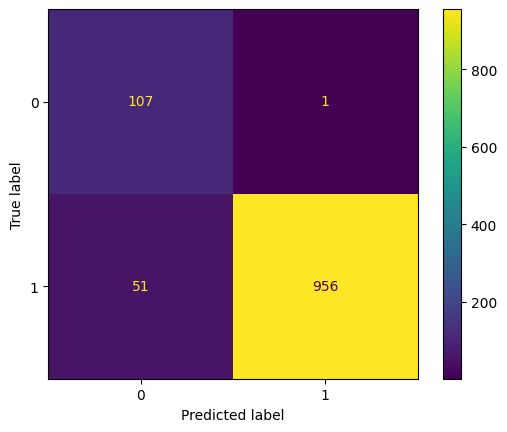

In [39]:
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cm).plot()